# Midterm Review Part 2

Source: https://www.kaggle.com/vinod00725/cars-dataset#cars.csv

### Import pandas, numpy, matplotlib.pyplot and PCA

In [92]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Read the csv file into a DataFrame: df

In [93]:
df = pd.read_csv('../Documents/cars-dataset/cars.csv')

### Print the head of df

In [94]:
df.head()

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
0,8895,USA,4.0,33,Small,2560,97,113
1,7402,USA,2.0,33,Small,2345,114,90
2,6319,Korea,4.0,37,Small,1845,81,63
3,6635,Japan/USA,5.0,32,Small,2260,91,92
4,6599,Japan,5.0,32,Small,2440,113,103


### display the sum of  missing value in df

In [95]:
df.isnull().sum()

Price           0
Country         0
Reliability    11
Mileage         0
Type            0
Weight          0
Disp.           0
HP              0
dtype: int64

### Replace missing values with 0(don't make a new copy)

In [96]:
df.fillna(0,inplace=True)

### Calculate summary statistic of df

In [97]:
df.describe()

,Price,Reliability,Mileage,Weight,Disp.,HP
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,12615.666667,2.766667,24.583333,2900.833333,152.050000,122.350000
std,4082.935753,1.862809,4.791559,495.866103,54.160911,30.980489
min,5866.000000,0.000000,18.000000,1845.000000,73.000000,63.000000
25%,9932.500000,1.000000,21.000000,2571.250000,113.750000,101.500000
50%,12215.500000,3.000000,23.000000,2885.000000,144.500000,111.500000
75%,14932.750000,5.000000,27.000000,3231.250000,180.000000,142.750000
max,24760.000000,5.000000,37.000000,3855.000000,305.000000,225.000000


### Filter catergorical columns

In [98]:
df_filtered = df.drop(['Country','Type'],axis=1)

### fit and transform PCA

In [99]:
pca = PCA(random_state=1111) 
pca.fit(df_filtered) 
df_reduced = pca.transform(df_filtered) 

### explained variance graph

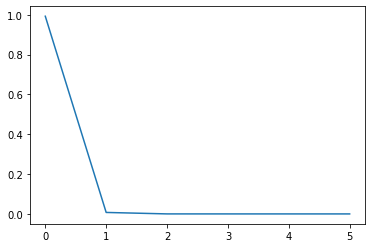

In [100]:
plt.plot(pca.explained_variance_ratio_)

### scatter plot of the projected data

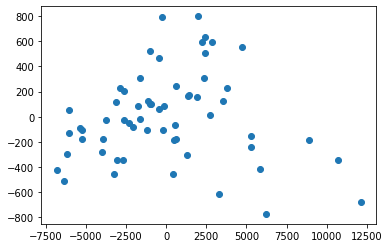

In [101]:
_ = plt.scatter(df_reduced[:,0], df_reduced[:,1])

### bar graph of the first 3 components

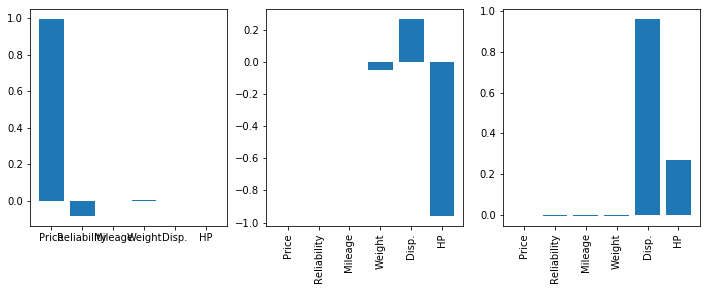

In [102]:
pca_weights = pca.components_

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(12,4))
_=ax1.bar(df_filtered.columns, pca_weights.T[0])
_ = ax2.set_xticklabels(df_filtered.columns, rotation=90)
_=ax2.bar(df_filtered.columns, pca_weights.T[1])
_ = ax3.set_xticklabels(df_filtered.columns, rotation=90)
_=ax3.bar(df_filtered.columns, pca_weights.T[2])
_ = ax3.set_xticklabels(df_filtered.columns, rotation=90)